### Data Preprocessing

In [1]:
import pandas as pd
import tensorflow as tf
import codecs
import numpy as np
import math
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import keras
import matplotlib.pyplot as plt
import keras.preprocessing
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.engine import Layer
from keras.layers import merge
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten, Add, Multiply
from keras import backend as K
from keras.layers import Activation, BatchNormalization
# regularizers
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras.layers import LSTM, Bidirectional
from keras.utils import plot_model
from keras.layers import Dropout
from scipy import signal
import openpyxl

data_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2011_smd_hourly.xls'
data_source_2011 = pd.read_excel(data_path_2011, sheet_name='ISONE CA')
data_source_2011 = pd.DataFrame(data_source_2011)
data_set_2011 = data_source_2011.iloc[:, -4:-1]
data_set_2011 = np.array(data_set_2011)

data_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2012_smd_hourly.xls'
data_source_2012 = pd.read_excel(data_path_2012, sheet_name='ISONE CA')
data_source_2012 = pd.DataFrame(data_source_2012)
data_set_2012a = np.array(data_source_2012.iloc[:1416, -4:-1])
data_set_2012b = np.array(data_source_2012.iloc[1440:, -4:-1])
data_set_2012 = np.vstack([data_set_2012a, data_set_2012b])
data_set_2012 = np.array(data_set_2012)

data_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2013_smd_hourly.xls'
data_source_2013 = pd.read_excel(data_path_2013, sheet_name='ISONE CA')
data_source_2013 = pd.DataFrame(data_source_2013)
data_set_2013 = data_source_2013.iloc[:, -4:-1]
data_set_2013 = np.array(data_set_2013)

data_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2014_smd_hourly.xls'
data_source_2014 = pd.read_excel(data_path_2014, sheet_name='ISONE CA')
data_source_2014 = pd.DataFrame(data_source_2014)
data_set_2014 = data_source_2014.iloc[:, -4:-1]
data_set_2014 = np.array(data_set_2014)

data_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2015_smd_hourly.xls'
data_source_2015 = pd.read_excel(data_path_2015, sheet_name='ISONE CA')
data_source_2015 = pd.DataFrame(data_source_2015)
data_set_2015 = data_source_2015.iloc[:, -4:-1]
data_set_2015 = np.array(data_set_2015)

data_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2016_smd_hourly.xls'
data_source_2016 = pd.read_excel(data_path_2016, sheet_name='ISO NE CA')
data_source_2016 = pd.DataFrame(data_source_2016)
data_set_2016a = np.array(data_source_2016.iloc[:1416, -5:-2])
data_set_2016b = np.array(data_source_2016.iloc[1440:, -5:-2])
data_set_2016 = np.vstack([data_set_2016a, data_set_2016b])
data_set_2016 = np.array(data_set_2016)

data_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2017_smd_hourly.xlsx'
data_source_2017 = pd.read_excel(data_path_2017, sheet_name='ISO NE CA')
data_source_2017 = pd.DataFrame(data_source_2017)
data_set_2017 = data_source_2017.iloc[:, -9:-6]
data_set_2017 = np.array(data_set_2017)

data_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2018_smd_hourly.xlsx'
data_source_2018 = pd.read_excel(data_path_2018, sheet_name='ISO NE CA')
data_source_2018 = pd.DataFrame(data_source_2018)
data_set_2018 = data_source_2018.iloc[:, -9:-6]
data_set_2018 = np.array(data_set_2018)

data_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2019_smd_hourly.xlsx'
data_source_2019 = pd.read_excel(data_path_2019, sheet_name='ISO NE CA')
data_source_2019 = pd.DataFrame(data_source_2019)
data_set_2019 = data_source_2019.iloc[:, -9:-6]
data_set_2019 = np.array(data_set_2019)

load = np.vstack([data_set_2011, data_set_2012, data_set_2013, data_set_2014, data_set_2015, data_set_2016, data_set_2017, data_set_2018, data_set_2019])
print(data_set_2011.shape)
print(data_set_2012.shape)
print(data_set_2013.shape)
print(data_set_2014.shape)
print(data_set_2015.shape)
print(data_set_2016.shape)
print(data_set_2017.shape)
print(data_set_2018.shape)
print(data_set_2019.shape)
print(load.shape)

pv_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2011.xlsx'
pv_source_2011 = pd.read_excel(pv_path_2011, sheet_name='HourlyData')
pv_source_2011 = pd.DataFrame(pv_source_2011)
pv_set_2011 = pv_source_2011.iloc[:, 3]
pv_set_2011 = pv_set_2011.fillna(0)
pv_set_2011 = np.array(pv_set_2011)
pv_set_2011 = pv_set_2011.reshape(-1,1)

pv_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2012.xlsx'
pv_source_2012 = pd.read_excel(pv_path_2012, sheet_name='HourlyData')
pv_source_2012 = pd.DataFrame(pv_source_2012)
pv_source_2012 = pv_source_2012.fillna(0)
pv_set_2012a = np.array(pv_source_2012.iloc[:1416, 3])
pv_set_2012b = np.array(pv_source_2012.iloc[1440:, 3])
pv_set_2012 = np.concatenate((pv_set_2012a, pv_set_2012b), axis=None)
pv_set_2012 = np.array(pv_set_2012)
pv_set_2012 = pv_set_2012.reshape(-1,1)

pv_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2013.xlsx'
pv_source_2013 = pd.read_excel(pv_path_2013, sheet_name='HourlyData')
pv_source_2013 = pd.DataFrame(pv_source_2013)
pv_set_2013 = pv_source_2013.iloc[:, 3]
pv_set_2013 = pv_set_2013.fillna(0)
pv_set_2013 = np.array(pv_set_2013)
pv_set_2013 = pv_set_2013.reshape(-1,1)

pv_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2014.xlsx'
pv_source_2014 = pd.read_excel(pv_path_2014, sheet_name='HourlyData')
pv_source_2014 = pd.DataFrame(pv_source_2014)
pv_set_2014 = pv_source_2014.iloc[:, 3]
pv_set_2014 = pv_set_2014.fillna(0)
pv_set_2014 = np.array(pv_set_2014)
pv_set_2014 = pv_set_2014.reshape(-1,1)

pv_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2015.xlsx'
pv_source_2015 = pd.read_excel(pv_path_2015, sheet_name='HourlyData')
pv_source_2015 = pd.DataFrame(pv_source_2015)
pv_set_2015 = pv_source_2015.iloc[:, 3]
pv_set_2015 = pv_set_2015.fillna(0)
pv_set_2015 = np.array(pv_set_2015)
pv_set_2015 = pv_set_2015.reshape(-1,1)

pv_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2016.xlsx'
pv_source_2016 = pd.read_excel(pv_path_2016, sheet_name='HourlyData')
pv_source_2016 = pd.DataFrame(pv_source_2016)
pv_source_2016 = pv_source_2016.fillna(0)
pv_set_2016a = np.array(pv_source_2016.iloc[:1416, 3])
pv_set_2016b = np.array(pv_source_2016.iloc[1440:, 3])
pv_set_2016 = np.concatenate((pv_set_2016a, pv_set_2016b), axis=None)
pv_set_2016 = np.array(pv_set_2016)
pv_set_2016 = pv_set_2016.reshape(-1,1)

pv_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2017.xlsx'
pv_source_2017 = pd.read_excel(pv_path_2017, sheet_name='HourlyData')
pv_source_2017 = pd.DataFrame(pv_source_2017)
pv_set_2017 = pv_source_2017.iloc[:, 3]
pv_set_2017 = pv_set_2017.fillna(0)
pv_set_2017 = np.array(pv_set_2017)
pv_set_2017 = pv_set_2017.reshape(-1,1)

pv_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2018.xlsx'
pv_source_2018 = pd.read_excel(pv_path_2018, sheet_name='HourlyData')
pv_source_2018 = pd.DataFrame(pv_source_2018)
pv_set_2018 = pv_source_2018.iloc[:, 3]
pv_set_2018 = pv_set_2018.fillna(0)
pv_set_2018 = np.array(pv_set_2018)
pv_set_2018 = pv_set_2018.reshape(-1,1)

pv_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2019.xlsx'
pv_source_2019 = pd.read_excel(pv_path_2019, sheet_name='HourlyData')
pv_source_2019 = pd.DataFrame(pv_source_2019)
pv_set_2019 = pv_source_2019.iloc[:, 3]
pv_set_2019 = pv_set_2019.fillna(0)
pv_set_2019 = np.array(pv_set_2019)
pv_set_2019 = pv_set_2019.reshape(-1,1)

pv = np.concatenate((pv_set_2011, pv_set_2012, pv_set_2013, pv_set_2014, pv_set_2015, pv_set_2016, pv_set_2017, pv_set_2018, pv_set_2019), axis=None)
pv = pv.reshape(-1,1)
print(pv.shape)

weather_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2011.csv'
weather_source_2011 = pd.read_csv(weather_path_2011)
weather_source_2011 = pd.DataFrame(weather_source_2011)
weather_set_2011 = weather_source_2011.iloc[2:, 5:16]
weather_set_2011 = np.array(weather_set_2011, dtype='float')

weather_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2012.csv'
weather_source_2012 = pd.read_csv(weather_path_2012)
weather_source_2012 = pd.DataFrame(weather_source_2012)
weather_set_2012 = weather_source_2012.iloc[2:, 5:16]
weather_set_2012 = np.array(weather_set_2012, dtype='float')

weather_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2013.csv'
weather_source_2013 = pd.read_csv(weather_path_2013)
weather_source_2013 = pd.DataFrame(weather_source_2013)
weather_set_2013 = weather_source_2013.iloc[2:, 5:16]
weather_set_2013 = np.array(weather_set_2013, dtype='float')

weather_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2014.csv'
weather_source_2014 = pd.read_csv(weather_path_2014)
weather_source_2014 = pd.DataFrame(weather_source_2014)
weather_set_2014 = weather_source_2014.iloc[2:, 5:16]
weather_set_2014 = np.array(weather_set_2014, dtype='float')

weather_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2015.csv'
weather_source_2015 = pd.read_csv(weather_path_2015)
weather_source_2015 = pd.DataFrame(weather_source_2015)
weather_set_2015 = weather_source_2015.iloc[2:, 5:16]
weather_set_2015 = np.array(weather_set_2015, dtype='float')

weather_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2016.csv'
weather_source_2016 = pd.read_csv(weather_path_2016)
weather_source_2016 = pd.DataFrame(weather_source_2016)
weather_set_2016 = weather_source_2016.iloc[2:, 5:16]
weather_set_2016 = np.array(weather_set_2016, dtype='float')

weather_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2017.csv'
weather_source_2017 = pd.read_csv(weather_path_2017)
weather_source_2017 = pd.DataFrame(weather_source_2017)
weather_set_2017 = weather_source_2017.iloc[2:, 5:16]
weather_set_2017 = np.array(weather_set_2017, dtype='float')

weather_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2018.csv'
weather_source_2018 = pd.read_csv(weather_path_2018)
weather_source_2018 = pd.DataFrame(weather_source_2018)
weather_set_2018 = weather_source_2018.iloc[2:, 5:16]
weather_set_2018 = np.array(weather_set_2018, dtype='float')

weather_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2019.csv'
weather_source_2019 = pd.read_csv(weather_path_2019)
weather_source_2019 = pd.DataFrame(weather_source_2019)
weather_set_2019 = weather_source_2019.iloc[2:, 5:16]
weather_set_2019 = np.array(weather_set_2019, dtype='float')

weather = np.vstack((weather_set_2011, weather_set_2012, weather_set_2013, weather_set_2014, weather_set_2015, weather_set_2016, weather_set_2017, weather_set_2018, weather_set_2019))
print(weather_set_2011.shape)
print(weather_set_2012.shape)
print(weather_set_2013.shape)
print(weather_set_2014.shape)
print(weather_set_2015.shape)
print(weather_set_2016.shape)
print(weather_set_2017.shape)
print(weather_set_2018.shape)
print(weather_set_2019.shape)
print(weather.shape)

weather_dat = np.zeros(shape=(78840,11))
print(weather[1,:])
print(weather[2,:])
print(weather[3,:])
for i in range(78840):
    weather_dat[i,:] = np.add(weather[2*i,:],weather[2*i+1,:])
weather_dat = np.true_divide(weather_dat,2)
print(weather_dat)
print(weather_dat.shape)

Using TensorFlow backend.


(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(78840, 3)
(78840, 1)


C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(157680, 11)
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5896e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5579e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5161e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[[  0.      0.      0.    ...   0.866   0.1   100.   ]
 [  0.      0.      0.    ...   0.866   0.1   100.   ]
 [  0.      0.      0.    ...   0.866   0.1   100.   ]
 ...
 [  0.      0.      0.    ...   0.11    0.4    97.18 ]
 [  0.      0.      0.    ...   0.11    0.4    96.97 ]
 [  0.      0.      0.    ...   0.11    0.4    97.225]]
(78840, 11)


In [2]:
dataall = np.hstack([load, pv, weather_dat])
index=['Dry bulb F','Dew Point F', 'System Load', 'Measured PV','DHI','DNI','GHI','CS_DHI','CS_DNI','CS_GHI','DP_C','SZ Angle','Surf Albedo','Wind Speed', 'Rel. Humidity']
dataall = np.vstack([index, dataall])
print(dataall.shape)
df = pd.DataFrame(dataall[1:,:], columns=dataall[0,:])
df.head()

(78841, 15)


,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,36.0,29.0,12214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.77,0.866,0.1,100.0
1,36.0,29.0,11573.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.7,0.866,0.1,100.0
2,35.0,29.0,11114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.23000000000002,0.866,0.1,100.0
3,35.0,30.0,10863.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.525,0.866,0.1,100.0
4,36.0,31.0,10827.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.47500000000001,0.866,0.1,100.0


In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.998572,0.994825,0.05,1.0
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.955240,0.994825,0.05,1.0
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.887636,0.994825,0.05,1.0
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.811215,0.994825,0.05,1.0
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.732332,0.994825,0.05,1.0


### Correlation / Lime based Feature Selection

In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.998572,0.994825,0.05,1.0
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.955240,0.994825,0.05,1.0
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.887636,0.994825,0.05,1.0
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.811215,0.994825,0.05,1.0
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.732332,0.994825,0.05,1.0


In [5]:
cor_norm_df = norm_df.iloc[:,[2, 4, 5, 6, 7, 8, 9, 11, 14]]
lime_norm_df = norm_df.iloc[:,[2, 3, 4, 9]]

In [16]:
shap_norm_df = norm_df.iloc[:,[2, 4, 5, 6, 7, 8, 9, 12]]

### Deep Learning Model

In [6]:
def create_dataset(dataset, timesteps):
    dataX, dataY = [], []
    for i in range(len(dataset) - timesteps - 1):
        a = dataset[i:(i + timesteps), :]
        dataX.append(a)
        dataY.append(dataset[i + timesteps, :])
    return np.array(dataX), np.array(dataY)

class LossHistory(keras.callbacks.Callback):  # history = LossHistory()
    def init(self):  # history.init()
        self.losses = []
        # self.accs = []
        self.val_losses = []
        # self.val_accs = []
        self.mses = []
        self.maes = []
        self.mapes = []
        self.val_mses = []
        self.val_maes = []
        self.val_mapes = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        # self.accs.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        # self.val_accs.append(logs.get('val_accuracy
        self.mses.append(logs.get('mean_squared_error'))
        self.maes.append(logs.get('mean_absolute_error'))
        self.mapes.append(logs.get('mean_absolute_percentage_error'))
        self.val_mses.append(logs.get('val_mean_squared_error'))
        self.val_maes.append(logs.get('val_mean_absolute_error'))
        self.val_mapes.append(logs.get('val_mean_absolute_percentage_error'))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [7]:
cor_norm_df = np.array(cor_norm_df)
lime_norm_df = np.array(lime_norm_df)

corX, corY = create_dataset(cor_norm_df, 24)
limeX, limeY = create_dataset(lime_norm_df, 24)

trXc = corX[:47286, :, :]
vaXc = corX[47286:55170, :, :]
teXc = corX[55170:, :, :]
trYc = corY[:47286, 0]
vaYc = corY[47286:55170,0]
teYc = corY[55170:, 0]

trXl = limeX[:47286, :, :]
vaXl = limeX[47286:55170, :, :]
teXl = limeX[55170:, :, :]
trYl = limeY[:47286, 0]
vaYl = limeY[47286:55170,0]
teYl = limeY[55170:, 0]

print(trXc.shape)
print(trYc.shape)
print(teXl.shape)

(47286, 24, 9)
(47286,)
(23645, 24, 4)


In [8]:
from keras.models import Model
from keras.layers import *
from keras.optimizers import Adam,SGD
from keras.backend import clear_session
import tensorflow.keras.backend as K
import tensorflow as tf
from keras.models import Sequential, Model 
from keras.layers import Dense, Input, Flatten, Add, concatenate, Dropout
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D  
from keras.layers.convolutional import Conv1D, AveragePooling1D, MaxPooling1D
from keras.utils import plot_model

In [9]:
from keras.models import Sequential, Model 
from keras.layers import Dense, Input, Flatten, Add, concatenate, Dropout
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D  
from keras.layers.convolutional import Conv1D, AveragePooling1D, MaxPooling1D
from keras.utils import plot_model

visible1 = Input(shape=(24, 9))    # 타임스텝 100, 피처 25, 21+4 

# visible2 = Input(shape=(sequence_length, nb_features))    # 타임스텝 100, 피처 25, 21+4 

d1 = Conv1D(filters=512, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=1)(visible1)  # 2x1=2,  x4  

d1 = Conv1D(filters=9, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=4)(d1)        # 2x4=8,  x4   

res01 = keras.layers.Add()([d1, visible1])   # (100, 25) (100, 25)
# ===== 2L 

d1 = Conv1D(filters=512, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=16)(res01)     # 2x16=32,  x4  

d1 = Conv1D(filters=9, kernel_size=4, padding='causal', activation='relu',  
            dilation_rate=32)(d1)        # 4x32= 128 

res02 = keras.layers.Add()([d1, res01])   # (100, 25) (100, 25)
# ===== 4L 

d1 = Conv1D(filters=512, kernel_size=4, padding='causal', activation='relu',  
            dilation_rate=16)(res02)    # 4x16= 64    ####### shrink layer

d1 = Conv1D(filters=9, kernel_size=8, padding='causal', activation='relu',  
            dilation_rate=4)(d1)        # 8x4= 32     ####### shrink layer

res03 = keras.layers.Add()([d1, res02])   # (100, 25) (100, 25)  # res03 --------------------------
# ===== 6L 

# below 4Layers 
#------------------------------------------------------

#out = Conv1D(1024, 1, padding='same', activation='elu')(res03)   # --------------------  
out = Conv1D(512, 1, padding='same', activation='relu')(res03)   # --------------------  
out = Dropout(0.2)(out)   

#out = Conv1D(512, 1, padding='same', activation='elu')(out) # 1 is 1x1 conv, same is normal conv.  
out = Conv1D(256, 1, padding='same', activation='relu')(out) # 1 is 1x1 conv, same is normal conv.  
out = Dropout(0.2)(out)  

#out = AveragePooling1D(pool_size=2, strides=2, padding='same')(out) # pool_size=2, strides=1
out = GlobalAveragePooling1D()(out) # pool_size=2, strides=1
# GlobalAveragePooling1D, GlobalMaxPooling1D  > AveragePooling1D, MaxPooling1D

out = Dense(1)(out) # Dense(1, ), nb_out = 1, # 마지막 아웃 풋에 액티베이션 펑션을 제거. 

# https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
# ---------------------------------------------------------------------

#model = Model(inputs=visible1, outputs=[out]) # from keras.models import Model
#model = Model(inputs=[visible1, visible2], outputs=[out]) # from keras.models import Model

model = Model(inputs=[visible1], outputs=[out]) # from keras.models import Model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
from keras import losses
from keras.losses import binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape'])
early_stopping =EarlyStopping(monitor='val_loss', patience=100)  # 10 -> 20 -> 4
batch_size = 100
epochs = 1000

history = LossHistory()
history.init()

hist = model.fit(trXc, trYc, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaXc, vaYc), callbacks=[history, early_stopping])  # , checkpoint


Train on 47286 samples, validate on 7884 samples
Epoch 1/1000
47286/47286 [==============================] - 8s 160us/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0558 - mape: 3436.6118 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0559 - val_mape: 20.9111
Epoch 2/1000
47286/47286 [==============================] - 5s 96us/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0340 - mape: 1427.1843 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0512 - val_mape: 19.8909
Epoch 3/1000
47286/47286 [==============================] - 5s 96us/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0299 - mape: 1678.5626 - val_loss: 0.0059 - val_mse: 0.0059 - val_mae: 0.0632 - val_mape: 25.8372
Epoch 4/1000
47286/47286 [==============================] - 5s 96us/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0283 - mape: 2082.3240 - val_loss: 0.0085 - val_mse: 0.0085 - val_mae: 0.0762 - val_mape: 31.6251
Epoch 5/1000
47286/47286 [==============================] - 5s 96us/step - loss: 0.0013 - mse: 0.0013 - mae: 0.02

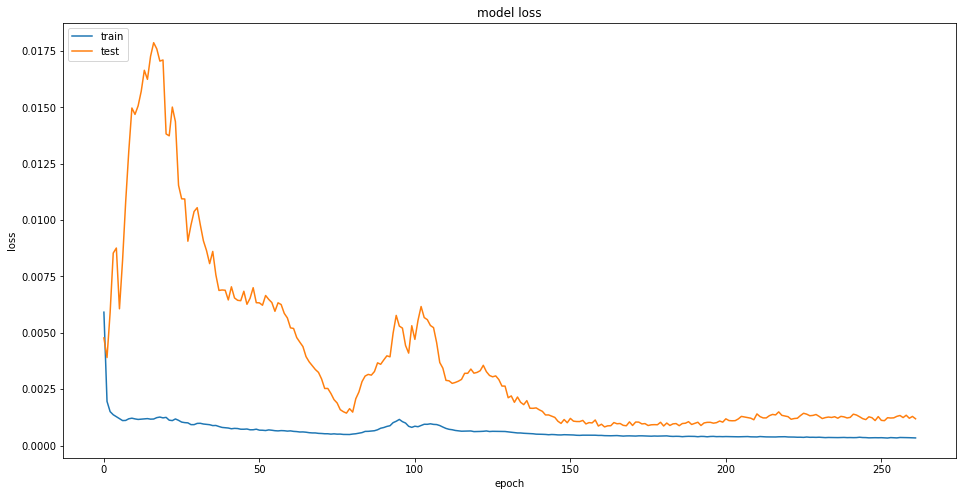

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8)) 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
def get_flops(model):
    run_meta = tf.RunMetadata()
    opts = tf.profiler.ProfileOptionBuilder.float_operation()

    # We use the Keras session graph in the call to the profiler.
    flops = tf.profiler.profile(graph=K.get_session().graph,
                                run_meta=run_meta, cmd='op', options=opts)

    return flops.total_float_ops  # Prints the "flops" of the model.

print(get_flops(model))

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
2871144


In [13]:
visible1 = Input(shape=(24, 4))    # 타임스텝 100, 피처 25, 21+4 

# visible2 = Input(shape=(sequence_length, nb_features))    # 타임스텝 100, 피처 25, 21+4 

d1 = Conv1D(filters=512, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=1)(visible1)  # 2x1=2,  x4  

d1 = Conv1D(filters=4, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=4)(d1)        # 2x4=8,  x4   

res01 = keras.layers.Add()([d1, visible1])   # (100, 25) (100, 25)
# ===== 2L 

d1 = Conv1D(filters=512, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=16)(res01)     # 2x16=32,  x4  

d1 = Conv1D(filters=4, kernel_size=4, padding='causal', activation='relu',  
            dilation_rate=32)(d1)        # 4x32= 128 

res02 = keras.layers.Add()([d1, res01])   # (100, 25) (100, 25)
# ===== 4L 

d1 = Conv1D(filters=512, kernel_size=4, padding='causal', activation='relu',  
            dilation_rate=16)(res02)    # 4x16= 64    ####### shrink layer

d1 = Conv1D(filters=4, kernel_size=8, padding='causal', activation='relu',  
            dilation_rate=4)(d1)        # 8x4= 32     ####### shrink layer

res03 = keras.layers.Add()([d1, res02])   # (100, 25) (100, 25)  # res03 --------------------------
# ===== 6L 

# below 4Layers 
#------------------------------------------------------

#out = Conv1D(1024, 1, padding='same', activation='elu')(res03)   # --------------------  
out = Conv1D(512, 1, padding='same', activation='relu')(res03)   # --------------------  
out = Dropout(0.2)(out)   

#out = Conv1D(512, 1, padding='same', activation='elu')(out) # 1 is 1x1 conv, same is normal conv.  
out = Conv1D(256, 1, padding='same', activation='relu')(out) # 1 is 1x1 conv, same is normal conv.  
out = Dropout(0.2)(out)  

#out = AveragePooling1D(pool_size=2, strides=2, padding='same')(out) # pool_size=2, strides=1
out = GlobalAveragePooling1D()(out) # pool_size=2, strides=1
# GlobalAveragePooling1D, GlobalMaxPooling1D  > AveragePooling1D, MaxPooling1D

out = Dense(1)(out) # Dense(1, ), nb_out = 1, # 마지막 아웃 풋에 액티베이션 펑션을 제거. 

# https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
# ---------------------------------------------------------------------

#model = Model(inputs=visible1, outputs=[out]) # from keras.models import Model
#model = Model(inputs=[visible1, visible2], outputs=[out]) # from keras.models import Model

model_lime = Model(inputs=[visible1], outputs=[out]) # from keras.models import Model

In [14]:
model_lime.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape'])
early_stopping =EarlyStopping(monitor='val_loss', patience=100)  # 10 -> 20 -> 4
batch_size = 100
epochs = 1000

history = LossHistory()
history.init()

hist_lime = model_lime.fit(trXl, trYl, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaXl, vaYl), callbacks=[history, early_stopping])  # , checkpoint

Train on 47286 samples, validate on 7884 samples
Epoch 1/1000
47286/47286 [==============================] - 6s 123us/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0514 - mape: 2410.7219 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0566 - val_mape: 24.4346
Epoch 2/1000
47286/47286 [==============================] - 4s 93us/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0349 - mape: 2111.0669 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0495 - val_mape: 20.8633
Epoch 3/1000
47286/47286 [==============================] - 4s 95us/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0304 - mape: 2060.5955 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0533 - val_mape: 23.4152
Epoch 4/1000
47286/47286 [==============================] - 4s 95us/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0289 - mape: 2096.5850 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0531 - val_mape: 23.4277
Epoch 5/1000
47286/47286 [==============================] - 4s 95us/step - loss: 0.0013 - mse: 0.0013 - mae: 0.028

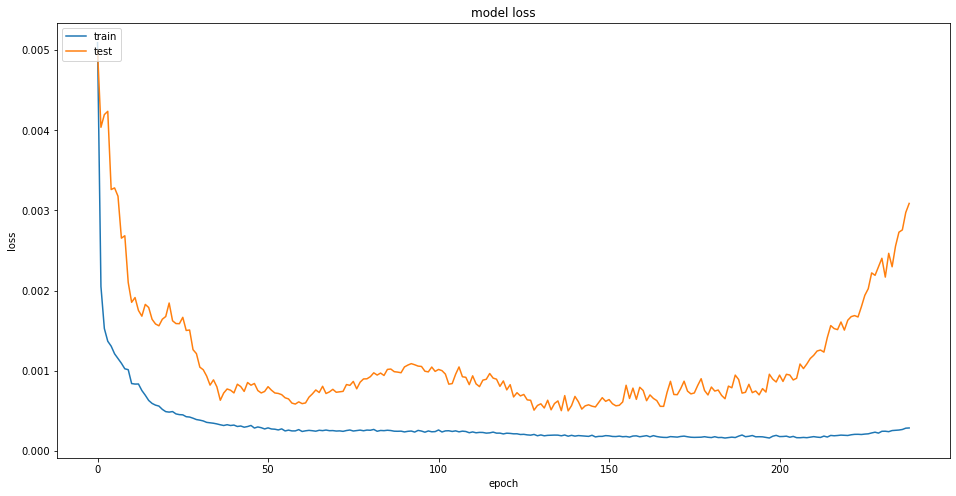

In [15]:
plt.figure(figsize=(16,8)) 
plt.plot(hist_lime.history['loss'])
plt.plot(hist_lime.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
print(get_flops(model_lime))

5035578


In [18]:
shap_norm_df = np.array(shap_norm_df)
shapX, shapY = create_dataset(shap_norm_df, 24)

trXs = shapX[:47286, :, :]
vaXs = shapX[47286:55170, :, :]
teXs = shapX[55170:, :, :]
trYs = shapY[:47286, 0]
vaYs = shapY[47286:55170,0]
teYs = shapY[55170:, 0]

print(trXs.shape)

(47286, 24, 8)


In [21]:
visible1 = Input(shape=(24, 8))    # 타임스텝 100, 피처 25, 21+4 

# visible2 = Input(shape=(sequence_length, nb_features))    # 타임스텝 100, 피처 25, 21+4 

d1 = Conv1D(filters=512, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=1)(visible1)  # 2x1=2,  x4  

d1 = Conv1D(filters=8, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=4)(d1)        # 2x4=8,  x4   

res01 = keras.layers.Add()([d1, visible1])   # (100, 25) (100, 25)
# ===== 2L 

d1 = Conv1D(filters=512, kernel_size=2, padding='causal', activation='relu',  
            dilation_rate=16)(res01)     # 2x16=32,  x4  

d1 = Conv1D(filters=8, kernel_size=4, padding='causal', activation='relu',  
            dilation_rate=32)(d1)        # 4x32= 128 

res02 = keras.layers.Add()([d1, res01])   # (100, 25) (100, 25)
# ===== 4L 

d1 = Conv1D(filters=512, kernel_size=4, padding='causal', activation='relu',  
            dilation_rate=16)(res02)    # 4x16= 64    ####### shrink layer

d1 = Conv1D(filters=8, kernel_size=8, padding='causal', activation='relu',  
            dilation_rate=4)(d1)        # 8x4= 32     ####### shrink layer

res03 = keras.layers.Add()([d1, res02])   # (100, 25) (100, 25)  # res03 --------------------------
# ===== 6L 

# below 4Layers 
#------------------------------------------------------

#out = Conv1D(1024, 1, padding='same', activation='elu')(res03)   # --------------------  
out = Conv1D(512, 1, padding='same', activation='relu')(res03)   # --------------------  
out = Dropout(0.2)(out)   

#out = Conv1D(512, 1, padding='same', activation='elu')(out) # 1 is 1x1 conv, same is normal conv.  
out = Conv1D(256, 1, padding='same', activation='relu')(out) # 1 is 1x1 conv, same is normal conv.  
out = Dropout(0.2)(out)  

#out = AveragePooling1D(pool_size=2, strides=2, padding='same')(out) # pool_size=2, strides=1
out = GlobalAveragePooling1D()(out) # pool_size=2, strides=1
# GlobalAveragePooling1D, GlobalMaxPooling1D  > AveragePooling1D, MaxPooling1D

out = Dense(1)(out) # Dense(1, ), nb_out = 1, # 마지막 아웃 풋에 액티베이션 펑션을 제거. 

# https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
# ---------------------------------------------------------------------

#model = Model(inputs=visible1, outputs=[out]) # from keras.models import Model
#model = Model(inputs=[visible1, visible2], outputs=[out]) # from keras.models import Model

model_shap = Model(inputs=[visible1], outputs=[out]) # from keras.models import Model

In [22]:
model_shap.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape'])
early_stopping =EarlyStopping(monitor='val_loss', patience=100)  # 10 -> 20 -> 4
batch_size = 100
epochs = 1000

history = LossHistory()
history.init()

hist_shap = model_shap.fit(trXs, trYs, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaXs, vaYs), callbacks=[history, early_stopping])  # , checkpoint

Train on 47286 samples, validate on 7884 samples
Epoch 1/1000
47286/47286 [==============================] - 6s 128us/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0578 - mape: 2503.4380 - val_loss: 0.0052 - val_mse: 0.0052 - val_mae: 0.0525 - val_mape: 19.2859
Epoch 2/1000
47286/47286 [==============================] - 5s 97us/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0411 - mape: 1869.5791 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0519 - val_mape: 20.8881
Epoch 3/1000
47286/47286 [==============================] - 5s 97us/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0360 - mape: 1630.0078 - val_loss: 0.0057 - val_mse: 0.0057 - val_mae: 0.0618 - val_mape: 25.5355
Epoch 4/1000
47286/47286 [==============================] - 5s 97us/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0346 - mape: 2164.3101 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0573 - val_mape: 23.3290
Epoch 5/1000
47286/47286 [==============================] - 5s 98us/step - loss: 0.0017 - mse: 0.0017 - mae: 0.032

8240025


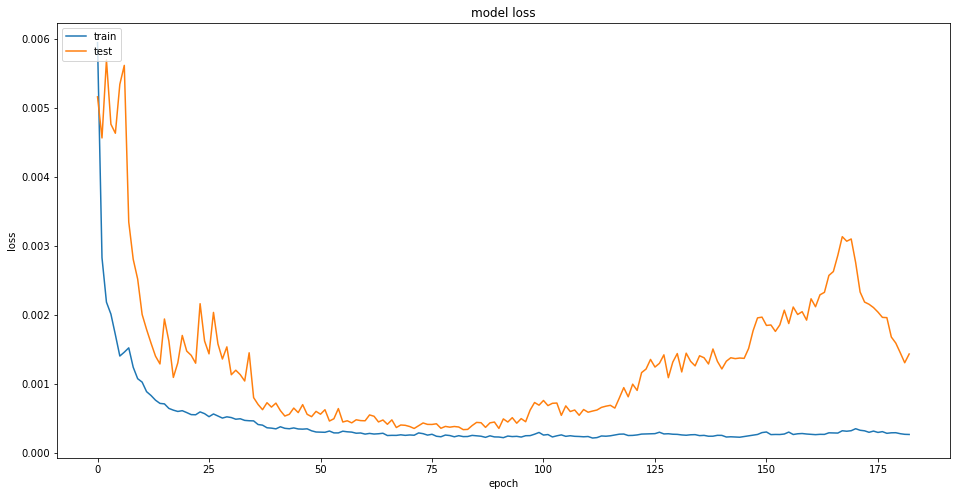

In [23]:
print(get_flops(model_shap))

plt.figure(figsize=(16,8)) 
plt.plot(hist_shap.history['loss'])
plt.plot(hist_shap.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()